In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.1 MB/s 
     |████████████████████████████████| 7.8 MB 53.8 MB/s 
     |████████████████████████████████| 16.6 MB 63 kB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn import linear_model, metrics

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/AQbench_dataset.csv")

In [5]:
df_plotting=pd.read_csv("/content/drive/MyDrive/AQbench_dataset.csv")
encoded_df_plot=pd.get_dummies(df_plotting)
train_plot=pd.DataFrame(encoded_df_plot[encoded_df_plot.dataset_train==1])
val_plot=pd.DataFrame(encoded_df_plot[encoded_df_plot.dataset_val==1])
test_plot = pd.DataFrame(encoded_df_plot[encoded_df_plot.dataset_test==1])

In [6]:
df.columns

Index(['id', 'country', 'htap_region', 'climatic_zone', 'lon', 'lat', 'alt',
       'relative_alt', 'type', 'type_of_area', 'water_25km',
       'evergreen_needleleaf_forest_25km', 'evergreen_broadleaf_forest_25km',
       'deciduous_needleleaf_forest_25km', 'deciduous_broadleaf_forest_25km',
       'mixed_forest_25km', 'closed_shrublands_25km', 'open_shrublands_25km',
       'woody_savannas_25km', 'savannas_25km', 'grasslands_25km',
       'permanent_wetlands_25km', 'croplands_25km', 'urban_and_built-up_25km',
       'cropland-natural_vegetation_mosaic_25km', 'snow_and_ice_25km',
       'barren_or_sparsely_vegetated_25km', 'wheat_production',
       'rice_production', 'nox_emissions', 'no2_column', 'population_density',
       'max_population_density_5km', 'max_population_density_25km',
       'nightlight_1km', 'nightlight_5km', 'max_nightlight_25km',
       'o3_average_values', 'o3_daytime_avg', 'o3_nighttime_avg', 'o3_median',
       'o3_perc25', 'o3_perc75', 'o3_perc90', 'o3_perc98

In [7]:
df.htap_region.unique()

array(['EUR', 'NAM', 'EAS', 'PAN', 'NPO', 'SAM', 'SPO', 'MCA', 'OCN',
       'SAS', 'SEA', 'NAF', 'SAF', 'RBU', 'MDE'], dtype=object)

In [8]:
for i in df.columns:
    if df[i].dtype!='O':
        df[i]=(df[i]-df[i].mean())/df[i].std()

In [9]:
encoded_df=pd.get_dummies(df)
encoded_df['lon'] = np.cos(np.pi*encoded_df['lon']/180)
encoded_df.head()

numeric_df=encoded_df.select_dtypes(include=np.number)
numeric_df.drop(['o3_daytime_avg', 'o3_nighttime_avg', 'o3_median',
       'o3_perc25', 'o3_perc75', 'o3_perc90', 'o3_perc98', 'o3_dma8eu',
       'o3_avgdma8epax', 'o3_drmdmax1h', 'o3_w90', 'o3_aot40', 'o3_nvgt070',
       'o3_nvgt100','id','country_American Samoa','country_Greenland'],axis=1,inplace=True)

In [10]:
train=pd.DataFrame(numeric_df[numeric_df.dataset_train==1])
val=pd.DataFrame(numeric_df[numeric_df.dataset_val==1])
test = pd.DataFrame(numeric_df[numeric_df.dataset_test==1])


Y_train=train['o3_average_values']
Y_val=val['o3_average_values']
Y_test=test['o3_average_values']
train.drop(['dataset_test','dataset_train','dataset_val','o3_average_values'],axis=1,inplace=True)
X_train=train
val.drop(['dataset_test','dataset_train','dataset_val','o3_average_values'],axis=1,inplace=True)
X_val=val
test.drop(['dataset_test','dataset_train','dataset_val','o3_average_values'],axis=1,inplace=True)
X_test=test

In [11]:
X_train

,lon,lat,alt,relative_alt,water_25km,evergreen_needleleaf_forest_25km,evergreen_broadleaf_forest_25km,deciduous_needleleaf_forest_25km,deciduous_broadleaf_forest_25km,mixed_forest_25km,...,type_background,type_industrial,type_other,type_traffic,type_unknown,type_of_area_remote,type_of_area_rural,type_of_area_suburban,type_of_area_unknown,type_of_area_urban
1,1.000000,1.143593,-0.565381,-0.455207,2.219671,-0.183149,-0.122695,-0.027886,-0.296481,-0.511181,...,1,0,0,0,0,0,1,0,0,0
2,0.999999,0.865371,-0.127893,0.151311,-0.653431,-0.107058,-0.122695,-0.027886,-0.296481,0.596979,...,1,0,0,0,0,0,0,0,0,1
4,0.999999,0.949042,-0.471021,-0.389890,-0.653431,-0.313591,-0.122695,-0.027886,-0.296481,-0.060560,...,1,0,0,0,0,0,1,0,0,0
5,0.999999,0.923650,-0.481744,-0.408552,-0.653431,0.349487,-0.122695,-0.027886,-0.296481,0.178545,...,0,1,0,0,0,0,0,0,0,1
6,0.999999,0.924477,-0.406684,-0.408552,-0.653431,-0.107058,-0.122695,-0.027886,-0.296481,0.178545,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5569,1.000000,0.766369,0.255981,-0.175276,-0.653431,-0.313591,-0.122695,-0.027886,-0.296481,-0.060560,...,1,0,0,0,0,0,1,0,0,0
5571,1.000000,0.729166,0.326751,-0.389890,-0.653431,-0.313591,-0.122695,-0.027886,-0.296481,0.040599,...,1,0,0,0,0,0,0,1,0,0
5572,1.000000,0.757166,0.170199,-0.119289,-0.653431,0.534279,-0.122695,-0.027886,-0.296481,0.960234,...,1,0,0,0,0,0,0,0,0,1
5573,1.000000,1.004963,-0.492466,-0.417883,-0.653431,0.566890,-0.122695,-0.027886,-0.296481,-0.230693,...,1,0,0,0,0,0,0,0,0,1


In [12]:
from sklearn import linear_model, metrics
from sklearn.metrics import r2_score
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, Y_train)

y_pred=reg.predict(X_val)
# variance score: 1 means perfect prediction
# print('Variance score: {}'.format(reg.score(X_val, Y_val)))
print('R2 score: {}'.format(r2_score(Y_val, y_pred)))

y_pred=reg.predict(X_test)
# variance score: 1 means perfect prediction
# print('Variance score: {}'.format(reg.score(X_val, Y_val)))
print('R2 score: {}'.format(r2_score(Y_test, y_pred)))

R2 score: 0.5350231467247425
R2 score: 0.5478471285415037


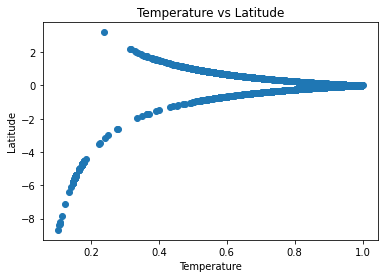

In [13]:
plt.scatter(1/(1+np.exp(np.log(abs(X_train['lat'])))),X_train['lat'])
plt.title("Temperature vs Latitude")
plt.xlabel('Temperature')
plt.ylabel('Latitude');

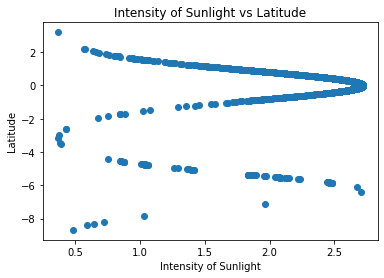

In [14]:
plt.scatter(np.exp(np.cos(abs(X_train['lat']))),X_train['lat'])
plt.title("Intensity of Sunlight vs Latitude")
plt.xlabel('Intensity of Sunlight')
plt.ylabel('Latitude');

In [15]:
X_train['multiplied_alt']=X_train['alt']*X_train['relative_alt']
X_val['multiplied_alt']=X_val['alt']*X_val['relative_alt']
X_test['multiplied_alt']=X_test['alt']*X_test['relative_alt']

X_train['temp']=1/(1+np.exp(np.log(abs(X_train['lat']))))
X_val['temp']=1/(1+np.exp(np.log(abs(X_val['lat']))))
X_test['temp']=1/(1+np.exp(np.log(abs(X_test['lat']))))

X_train['sunlight']=np.exp(np.cos(abs(X_train['lat'])))
X_val['sunlight']=np.exp(np.cos(abs(X_val['lat'])))
X_test['sunlight']=np.exp(np.cos(abs(X_test['lat'])))

X_train['alt_temp']=X_train['alt']*X_train['temp']*X_train['sunlight']
X_val['alt_temp']=X_val['alt']*X_val['temp']*X_val['sunlight']
X_test['alt_temp']=X_test['alt']*X_test['temp']*X_test['sunlight']

X_train['nox_temp']=X_train['temp']*X_train['no2_column']*X_train['sunlight']
X_val['nox_temp']=X_val['temp']*X_val['no2_column']*X_val['sunlight']
X_test['nox_temp']=X_test['temp']*X_test['no2_column']*X_test['sunlight']

X_train['water_25_temp']=X_train['water_25km']*X_train['temp']*X_train['sunlight']
X_val['water_25_temp']=X_val['water_25km']*X_val['temp']*X_val['sunlight']
X_test['water_25_temp']=X_test['water_25km']*X_test['temp']*X_test['sunlight']

X_train['nox_temp_urban']=X_train['temp']*X_train['no2_column']*X_train['type_of_area_urban']
X_val['nox_temp_urban']=X_val['temp']*X_val['no2_column']*X_val['type_of_area_urban']
X_test['nox_temp_urban']=X_test['temp']*X_test['no2_column']*X_test['type_of_area_urban']

X_train['alt_temp_nox']=X_train['temp']*X_train['no2_column']*X_train['relative_alt']
X_val['alt_temp_nox']=X_val['temp']*X_val['no2_column']*X_val['relative_alt']
X_test['alt_temp_nox']=X_test['temp']*X_test['no2_column']*X_test['relative_alt']

X_train['alt_temp_nox_water']=X_train['temp']*X_train['no2_column']*X_train['relative_alt']*X_train['water_25km']*X_train['sunlight']
X_val['alt_temp_nox_water']=X_val['temp']*X_val['no2_column']*X_val['relative_alt']*X_val['water_25km']*X_val['sunlight']
X_test['alt_temp_nox_water']=X_test['temp']*X_test['no2_column']*X_test['relative_alt']*X_test['water_25km']*X_test['sunlight']

X_train['multiplied_urban_population_density']=X_train['type_of_area_urban']*X_train['max_population_density_5km']*X_train['nox_emissions']
X_val['multiplied_urban_population_density']=X_val['type_of_area_urban']*X_val['max_population_density_5km']*X_val['nox_emissions']
X_test['multiplied_urban_population_density']=X_test['type_of_area_urban']*X_test['max_population_density_5km']*X_test['nox_emissions']

X_train['multiplied_urban_population_density_25']=X_train['type_of_area_urban']*X_train['max_population_density_25km']*X_train['nox_emissions']
X_val['multiplied_urban_population_density_25']=X_val['type_of_area_urban']*X_val['max_population_density_25km']*X_val['nox_emissions']
X_test['multiplied_urban_population_density_25']=X_test['type_of_area_urban']*X_test['max_population_density_25km']*X_test['nox_emissions']

X_train['multiplied_urban_nightlight']=X_train['type_of_area_urban']*X_train['nightlight_1km']*X_train['nox_emissions']
X_val['multiplied_urban_nightlight']=X_val['type_of_area_urban']*X_val['nightlight_1km']*X_val['nox_emissions']
X_test['multiplied_urban_nightlight']=X_test['type_of_area_urban']*X_test['nightlight_1km']*X_test['nox_emissions']

X_train['multiplied_urban_nightlight_5']=X_train['type_of_area_urban']*X_train['nightlight_5km']*X_train['nox_emissions']
X_val['multiplied_urban_nightlight_5']=X_val['type_of_area_urban']*X_val['nightlight_5km']*X_val['nox_emissions']
X_test['multiplied_urban_nightlight_5']=X_test['type_of_area_urban']*X_test['nightlight_5km']*X_test['nox_emissions']

X_train['multiplied_htap_region_EUR']=X_train['htap_region_EUR']*abs(X_train['lat'])
X_val['multiplied_htap_region_EUR']=X_val['htap_region_EUR']*abs(X_val['lat'])
X_test['multiplied_htap_region_EUR']=X_test['htap_region_EUR']*abs(X_test['lat'])

X_train['multiplied_htap_region_EAS']=X_train['htap_region_EAS']*abs(X_train['lat'])
X_val['multiplied_htap_region_EAS']=X_val['htap_region_EAS']*abs(X_val['lat'])
X_test['multiplied_htap_region_EAS']=X_test['htap_region_EAS']*abs(X_test['lat'])

X_train['multiplied_htap_region_NAM']=X_train['htap_region_NAM']*abs(X_train['lat'])
X_val['multiplied_htap_region_NAM']=X_val['htap_region_NAM']*abs(X_val['lat'])
X_test['multiplied_htap_region_NAM']=X_test['htap_region_NAM']*abs(X_test['lat'])

X_train['multiplied_htap_region_SAM']=X_train['htap_region_SAM']*abs(X_train['lat'])
X_val['multiplied_htap_region_SAM']=X_val['htap_region_SAM']*abs(X_val['lat'])
X_test['multiplied_htap_region_SAM']=X_test['htap_region_SAM']*abs(X_test['lat'])

X_train['multiplied_htap_region_NAF']=X_train['htap_region_NAF']*abs(X_train['lat'])
X_val['multiplied_htap_region_NAF']=X_val['htap_region_NAF']*abs(X_val['lat'])
X_test['multiplied_htap_region_NAF']=X_test['htap_region_NAF']*abs(X_test['lat'])

X_train['multiplied_htap_region_SAF']=X_train['htap_region_PAN']*abs(X_train['lat'])
X_val['multiplied_htap_region_SAF']=X_val['htap_region_PAN']*abs(X_val['lat'])
X_test['multiplied_htap_region_SAF']=X_test['htap_region_PAN']*abs(X_test['lat'])

X_train['multiplied_htap_region_SEA']=X_train['htap_region_SEA']*abs(X_train['lat'])
X_val['multiplied_htap_region_SEA']=X_val['htap_region_SEA']*abs(X_val['lat'])
X_test['multiplied_htap_region_SEA']=X_test['htap_region_SEA']*abs(X_test['lat'])

X_train['evergreen_needleleaf_forest_25km_lat']=X_train['evergreen_needleleaf_forest_25km']*abs(X_train['lat'])*X_train['permanent_wetlands_25km']*X_train['no2_column']
X_val['evergreen_needleleaf_forest_25km_lat']=X_val['evergreen_needleleaf_forest_25km']*abs(X_val['lat'])*X_val['permanent_wetlands_25km']*X_val['no2_column']
X_test['evergreen_needleleaf_forest_25km_lat']=X_test['evergreen_needleleaf_forest_25km']*abs(X_test['lat'])*X_test['permanent_wetlands_25km']*X_test['no2_column']

X_train['evergreen_needleleaf_forest_25km_lat_sunlight']=X_train['evergreen_needleleaf_forest_25km']*abs(X_train['lat'])*X_train['sunlight']*X_train['nox_emissions']
X_val['evergreen_needleleaf_forest_25km_lat_sunlight']=X_val['evergreen_needleleaf_forest_25km']*abs(X_val['lat'])*X_val['sunlight']*X_val['nox_emissions']
X_test['evergreen_needleleaf_forest_25km_lat_sunlight']=X_test['evergreen_needleleaf_forest_25km']*abs(X_test['lat'])*X_test['sunlight']*X_test['nox_emissions']

X_train['evergreen_needleleaf_forest_25km_lat_sunlight_no2']=X_train['evergreen_needleleaf_forest_25km']*abs(X_train['lat'])*X_train['sunlight']*X_train['permanent_wetlands_25km']*X_train['nox_emissions']
X_val['evergreen_needleleaf_forest_25km_lat_sunlight_no2']=X_val['evergreen_needleleaf_forest_25km']*abs(X_val['lat'])*X_val['sunlight']*X_val['permanent_wetlands_25km']*X_val['nox_emissions']
X_test['evergreen_needleleaf_forest_25km_lat_sunlight_no2']=X_test['evergreen_needleleaf_forest_25km']*abs(X_test['lat'])*X_test['sunlight']*X_test['permanent_wetlands_25km']*X_test['nox_emissions']

X_train['mixed_forest_25km_lat']=X_train['mixed_forest_25km']*abs(X_train['lat'])*X_train['permanent_wetlands_25km']*X_train['no2_column']
X_val['mixed_forest_25km_lat']=X_val['mixed_forest_25km']*abs(X_val['lat'])*X_val['permanent_wetlands_25km']*X_val['no2_column']
X_test['mixed_forest_25km_lat']=X_test['mixed_forest_25km']*abs(X_test['lat'])*X_test['permanent_wetlands_25km']*X_test['no2_column']

X_train['deciduous_needleleaf_forest_25km_lat']=X_train['deciduous_needleleaf_forest_25km']*abs(X_train['lat'])*X_train['water_25km']*X_train['no2_column']
X_val['deciduous_needleleaf_forest_25km_lat']=X_val['deciduous_needleleaf_forest_25km']*abs(X_val['lat'])*X_val['water_25km']*X_val['no2_column']
X_test['deciduous_needleleaf_forest_25km_lat']=X_test['deciduous_needleleaf_forest_25km']*abs(X_test['lat'])*X_test['water_25km']*X_test['no2_column']

X_train['deciduous_needleleaf_forest_25km_lat_sun']=X_train['deciduous_needleleaf_forest_25km']*abs(X_train['lat'])*X_train['sunlight']*X_train['water_25km']
X_val['deciduous_needleleaf_forest_25km_lat_sun']=X_val['deciduous_needleleaf_forest_25km']*abs(X_val['lat'])*X_val['sunlight']*X_val['water_25km']
X_test['deciduous_needleleaf_forest_25km_lat_sun']=X_test['deciduous_needleleaf_forest_25km']*abs(X_test['lat'])*X_test['sunlight']*X_test['water_25km']

# X_train['deciduous_needleleaf_forest_25km_lat_sun_no2']=X_train['deciduous_needleleaf_forest_25km']*abs(X_train['lat'])*X_train['sunlight']*X_train['no2_column']
# X_val['deciduous_needleleaf_forest_25km_lat_sun_no2']=X_val['deciduous_needleleaf_forest_25km']*abs(X_val['lat'])*X_val['sunlight']*X_val['no2_column']
# X_test['deciduous_needleleaf_forest_25km_lat_sun_no2']=X_test['deciduous_needleleaf_forest_25km']*abs(X_test['lat'])*X_test['sunlight']*X_test['no2_column']

X_train['deciduous_broadleaf_forest_25km_lat']=X_train['deciduous_broadleaf_forest_25km']*abs(X_train['lat'])*X_train['permanent_wetlands_25km']*X_train['no2_column']
X_val['deciduous_broadleaf_forest_25km_lat']=X_val['deciduous_broadleaf_forest_25km']*abs(X_val['lat'])*X_val['permanent_wetlands_25km']*X_val['no2_column']
X_test['deciduous_broadleaf_forest_25km_lat']=X_test['deciduous_broadleaf_forest_25km']*abs(X_test['lat'])*X_test['permanent_wetlands_25km']*X_test['no2_column']

X_train['evergreen_broadleaf_forest_25km_lat_sun']=X_train['evergreen_broadleaf_forest_25km']*abs(X_train['lat'])*X_train['sunlight']*X_train['permanent_wetlands_25km']
X_val['evergreen_broadleaf_forest_25km_lat_sun']=X_val['evergreen_broadleaf_forest_25km']*abs(X_val['lat'])*X_val['sunlight']*X_val['permanent_wetlands_25km']
X_test['evergreen_broadleaf_forest_25km_lat_sun']=X_test['evergreen_broadleaf_forest_25km']*abs(X_test['lat'])*X_test['sunlight']*X_test['permanent_wetlands_25km']

X_train['evergreen_broadleaf_forest_25km_lat_sun_no2']=X_train['evergreen_broadleaf_forest_25km']*abs(X_train['lat'])*X_train['sunlight']*X_train['no2_column']
X_val['evergreen_broadleaf_forest_25km_lat_sun_no2']=X_val['evergreen_broadleaf_forest_25km']*abs(X_val['lat'])*X_val['sunlight']*X_val['no2_column']
X_test['evergreen_broadleaf_forest_25km_lat_sun_no2']=X_test['evergreen_broadleaf_forest_25km']*abs(X_test['lat'])*X_test['sunlight']*X_test['no2_column']

X_train['barren_or_sparsely_vegetated_25km_lat']=X_train['barren_or_sparsely_vegetated_25km']*abs(X_train['lat'])*X_train['water_25km']*X_train['no2_column']
X_val['barren_or_sparsely_vegetated_25km_lat']=X_val['barren_or_sparsely_vegetated_25km']*abs(X_val['lat'])*X_val['water_25km']*X_val['no2_column']
X_test['barren_or_sparsely_vegetated_25km_lat']=X_test['barren_or_sparsely_vegetated_25km']*abs(X_test['lat'])*X_test['water_25km']*X_test['no2_column']

X_train['grassland_temp_alt']=X_train['grasslands_25km']*abs(X_train['lat'])*X_train['temp']*X_train['water_25km']
X_val['grassland_temp_alt']=X_val['grasslands_25km']*abs(X_val['lat'])*X_val['temp']*X_val['water_25km']
X_test['grassland_temp_alt']=X_test['grasslands_25km']*abs(X_test['lat'])*X_test['temp']*X_test['water_25km']

X_train['woody_savannas_25km_temp_alt']=X_train['woody_savannas_25km']*abs(X_train['lat'])*X_train['nox_emissions']*X_train['permanent_wetlands_25km']*X_train['relative_alt']*X_train['no2_column']
X_val['woody_savannas_25km_temp_alt']=X_val['woody_savannas_25km']*abs(X_val['lat'])*X_val['nox_emissions']*X_val['permanent_wetlands_25km']*X_val['relative_alt']*X_val['no2_column']
X_test['woody_savannas_25km_temp_alt']=X_test['woody_savannas_25km']*abs(X_test['lat'])*X_test['nox_emissions']*X_test['permanent_wetlands_25km']*X_test['relative_alt']*X_test['no2_column']

X_train['snow_and_ice_25km_temp_alt']=X_train['snow_and_ice_25km']*X_train['nox_emissions']*X_train['permanent_wetlands_25km']*X_train['relative_alt']*X_train['no2_column']*X_train['temp']
X_val['snow_and_ice_25km_temp_alt']=X_val['snow_and_ice_25km']*X_val['nox_emissions']*X_val['permanent_wetlands_25km']*X_val['relative_alt']*X_val['no2_column']*X_val['temp']
X_test['snow_and_ice_25km_temp_alt']=X_test['snow_and_ice_25km']*X_test['nox_emissions']*X_test['permanent_wetlands_25km']*X_test['relative_alt']*X_test['no2_column']*X_test['temp']

X_train['snow_and_ice_25km_sun_water']=X_train['snow_and_ice_25km']*X_train['sunlight']*X_train['permanent_wetlands_25km']*X_train['relative_alt']*X_train['no2_column']
X_val['snow_and_ice_25km_sun_water']=X_val['snow_and_ice_25km']*X_val['sunlight']*X_val['permanent_wetlands_25km']*X_val['relative_alt']*X_val['no2_column']
X_test['snow_and_ice_25km_sun_water']=X_test['snow_and_ice_25km']*X_test['sunlight']*X_test['permanent_wetlands_25km']*X_test['relative_alt']*X_test['no2_column']

X_train['croplands_25km_lat']=X_train['croplands_25km']*abs(X_train['lat'])*X_train['permanent_wetlands_25km']*X_train['wheat_production']
X_val['croplands_25km_lat']=X_val['croplands_25km']*abs(X_val['lat'])*X_val['permanent_wetlands_25km']*X_val['wheat_production']
X_test['croplands_25km_lat']=X_test['croplands_25km']*abs(X_test['lat'])*X_test['permanent_wetlands_25km']*X_test['wheat_production']

X_train['croplands_25km_lat_rice']=X_train['croplands_25km']*abs(X_train['lat'])*X_train['permanent_wetlands_25km']*X_train['rice_production']
X_val['croplands_25km_lat_rice']=X_val['croplands_25km']*abs(X_val['lat'])*X_val['permanent_wetlands_25km']*X_val['rice_production']
X_test['croplands_25km_lat_rice']=X_test['croplands_25km']*abs(X_test['lat'])*X_test['permanent_wetlands_25km']*X_test['rice_production']

X_train['urban_built_up_no2']=X_train['urban_and_built-up_25km']*X_train['nox_emissions']*X_train['relative_alt']*X_train['wheat_production']
X_val['urban_built_up_no2']=X_val['urban_and_built-up_25km']*X_val['nox_emissions']*X_val['relative_alt']*X_val['wheat_production']
X_test['urban_built_up_no2']=X_test['urban_and_built-up_25km']*X_test['nox_emissions']*X_test['relative_alt']*X_test['wheat_production']

# X_train['savannas_25km_lat']=X_train['savannas_25km']*abs(X_train['lat'])*X_train['water_25km']
# X_val['savannas_25km_lat']=X_val['savannas_25km']*abs(X_val['lat'])*X_val['water_25km']
# X_test['savannas_25km_lat']=X_test['savannas_25km']*abs(X_test['lat'])*X_test['water_25km']

# X_train['croplands_25km_lat']=X_train['croplands_25km']*abs(X_train['lat'])*X_train['permanent_wetlands_25km']
# X_val['croplands_25km_lat']=X_val['croplands_25km']*abs(X_val['lat'])*X_val['permanent_wetlands_25km']
# X_test['croplands_25km_lat']=X_test['croplands_25km']*abs(X_test['lat'])*X_test['permanent_wetlands_25km']

# X_train['multiplied_alt']=X_train['alt']*X_train['relative_alt']
# X_val['multiplied_alt']=X_val['alt']*X_val['relative_alt']
# X_test['multiplied_alt']=X_test['alt']*X_test['relative_alt']

# X_train['temp']=1/(1+np.exp(-np.log(abs(X_train['lat']))))
# X_val['temp']=1/(1+np.exp(-np.log(abs(X_val['lat']))))
# X_test['temp']=1/(1+np.exp(-np.log(abs(X_test['lat']))))

# X_train['sunlight']=X_train['temp']*abs(X_train['lat'])
# X_val['sunlight']=X_val['temp']*abs(X_val['lat'])
# X_test['sunlight']=X_test['temp']*abs(X_test['lat'])

# X_train['alt_temp']=X_train['alt']*X_train['temp']
# X_val['alt_temp']=X_val['alt']*X_val['temp']
# X_test['alt_temp']=X_test['alt']*X_test['temp']

# X_train['nox_temp']=X_train['temp']*X_train['no2_column']
# X_val['nox_temp']=X_val['temp']*X_val['no2_column']
# X_test['nox_temp']=X_test['temp']*X_test['no2_column']

# X_train['nox_temp_alt']=X_train['temp']*X_train['no2_column']*X_train['alt']
# X_val['nox_temp_alt']=X_val['temp']*X_val['no2_column']*X_val['alt']
# X_test['nox_temp_alt']=X_test['temp']*X_test['no2_column']*X_test['alt']

# X_train['water_25_temp']=X_train['water_25km']*X_train['temp']
# X_val['water_25_temp']=X_val['water_25km']*X_val['temp']
# X_test['water_25_temp']=X_test['water_25km']*X_test['temp']

# X_train['nox_temp_urban']=X_train['temp']*X_train['no2_column']*X_train['type_of_area_urban']
# X_val['nox_temp_urban']=X_val['temp']*X_val['no2_column']*X_val['type_of_area_urban']
# X_test['nox_temp_urban']=X_test['temp']*X_test['no2_column']*X_test['type_of_area_urban']

# X_train['alt_temp_nox']=X_train['temp']*X_train['no2_column']*X_train['relative_alt']
# X_val['alt_temp_nox']=X_val['temp']*X_val['no2_column']*X_val['relative_alt']
# X_test['alt_temp_nox']=X_test['temp']*X_test['no2_column']*X_test['relative_alt']

# X_train['alt_temp_nox_water']=X_train['temp']*X_train['no2_column']*X_train['relative_alt']*X_train['water_25km']
# X_val['alt_temp_nox_water']=X_val['temp']*X_val['no2_column']*X_val['relative_alt']*X_val['water_25km']
# X_test['alt_temp_nox_water']=X_test['temp']*X_test['no2_column']*X_test['relative_alt']*X_test['water_25km']


# X_train['evergreen_needleleaf_temp_alt']=X_train['evergreen_needleleaf_forest_25km']*X_train['lat']*X_train['relative_alt']
# X_val['evergreen_needleleaf_temp_alt']=X_val['evergreen_needleleaf_forest_25km']*X_val['lat']*X_val['relative_alt']
# X_test['evergreen_needleleaf_temp_alt']=X_test['evergreen_needleleaf_forest_25km']*X_test['lat']*X_test['relative_alt']

# X_train['multiplied_urban_population_density']=X_train['type_of_area_urban']*X_train['max_population_density_5km']*X_train['nox_emissions']
# X_val['multiplied_urban_population_density']=X_val['type_of_area_urban']*X_val['max_population_density_5km']*X_val['nox_emissions']
# X_test['multiplied_urban_population_density']=X_test['type_of_area_urban']*X_test['max_population_density_5km']*X_test['nox_emissions']

# X_train['multiplied_urban_population_density_25']=X_train['type_of_area_urban']*X_train['max_population_density_25km']*X_train['nox_emissions']
# X_val['multiplied_urban_population_density_25']=X_val['type_of_area_urban']*X_val['max_population_density_25km']*X_val['nox_emissions']
# X_test['multiplied_urban_population_density_25']=X_test['type_of_area_urban']*X_test['max_population_density_25km']*X_test['nox_emissions']

# X_train['multiplied_urban_nightlight']=X_train['type_of_area_urban']*X_train['nightlight_1km']*X_train['nox_emissions']
# X_val['multiplied_urban_nightlight']=X_val['type_of_area_urban']*X_val['nightlight_1km']*X_val['nox_emissions']
# X_test['multiplied_urban_nightlight']=X_test['type_of_area_urban']*X_test['nightlight_1km']*X_test['nox_emissions']

# X_train['multiplied_urban_nightlight_5']=X_train['type_of_area_urban']*X_train['nightlight_5km']*X_train['nox_emissions']
# X_val['multiplied_urban_nightlight_5']=X_val['type_of_area_urban']*X_val['nightlight_5km']*X_val['nox_emissions']
# X_test['multiplied_urban_nightlight_5']=X_test['type_of_area_urban']*X_test['nightlight_5km']*X_test['nox_emissions']

# X_train['urban_built_up_no2_temp']=X_train['urban_and_built-up_25km']*X_train['nox_emissions']*X_train['temp']*X_train['permanent_wetlands_25km']
# X_val['urban_built_up_no2_temp']=X_val['urban_and_built-up_25km']*X_val['nox_emissions']*X_val['temp']*X_val['permanent_wetlands_25km']
# X_test['urban_built_up_no2_temp']=X_test['urban_and_built-up_25km']*X_test['nox_emissions']*X_test['temp']*X_test['permanent_wetlands_25km']

# X_train['rice_no2']=X_train['water_25km']*X_train['no2_column']*X_train['relative_alt']*X_train['rice_production']
# X_val['rice_no2']=X_val['water_25km']*X_val['no2_column']*X_val['relative_alt']*X_val['rice_production']
# X_test['rice_no2']=X_test['water_25km']*X_test['no2_column']*X_test['relative_alt']*X_test['rice_production']

# X_train['wheat_no2']=X_train['water_25km']*X_train['no2_column']*X_train['relative_alt']*X_train['wheat_production']
# X_val['wheat_no2']=X_val['water_25km']*X_val['no2_column']*X_val['relative_alt']*X_val['wheat_production']
# X_test['wheat_no2']=X_test['water_25km']*X_test['no2_column']*X_test['relative_alt']*X_test['wheat_production']


# X_train['urban_built_up_nox']=X_train['urban_and_built-up_25km']*X_train['nox_emissions']*X_train['relative_alt']*X_train['wheat_production']*X_train['rice_production']
# X_val['urban_built_up_nox']=X_val['urban_and_built-up_25km']*X_val['nox_emissions']*X_val['relative_alt']*X_val['wheat_production']*X_val['rice_production']
# X_test['urban_built_up_nox']=X_test['urban_and_built-up_25km']*X_test['nox_emissions']*X_test['relative_alt']*X_test['wheat_production']*X_test['rice_production']

# # X_train['multiplied_htap_region_EUR']=X_train['htap_region_EUR']*X_train['temp']
# # X_val['multiplied_htap_region_EUR']=X_val['htap_region_EUR']*X_val['temp']
# # X_test['multiplied_htap_region_EUR']=X_test['htap_region_EUR']*X_test['temp']

# # X_train['multiplied_htap_region_EAS']=X_train['htap_region_EAS']*X_train['temp']
# # X_val['multiplied_htap_region_EAS']=X_val['htap_region_EAS']*X_val['temp']
# # X_test['multiplied_htap_region_EAS']=X_test['htap_region_EAS']*X_test['temp']

# # X_train['multiplied_htap_region_OCN']=X_train['htap_region_OCN']*X_train['temp']
# # X_val['multiplied_htap_region_OCN']=X_val['htap_region_OCN']*X_val['temp']
# # X_test['multiplied_htap_region_OCN']=X_test['htap_region_OCN']*X_test['temp']

# # X_train['multiplied_htap_region_SEA']=X_train['htap_region_SEA']*X_train['temp']
# # X_val['multiplied_htap_region_SEA']=X_val['htap_region_SEA']*X_val['temp']
# # X_test['multiplied_htap_region_SEA']=X_test['htap_region_SEA']*X_test['temp']





In [16]:
from sklearn import linear_model, metrics
from sklearn.metrics import r2_score
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, Y_train)

y_pred=reg.predict(X_val)
# variance score: 1 means perfect prediction
# print('Variance score: {}'.format(reg.score(X_val, Y_val)))
print('R2 score: {}'.format(r2_score(Y_val, y_pred)))

y_pred=reg.predict(X_test)
# variance score: 1 means perfect prediction
# print('Variance score: {}'.format(reg.score(X_val, Y_val)))
print('R2 score: {}'.format(r2_score(Y_test, y_pred)))

R2 score: 0.541883463349424
R2 score: 0.5798653476515021


In [17]:
df_plot=pd.read_csv("/content/drive/MyDrive/AQbench_dataset.csv")
plot_df_LR=pd.DataFrame()
plot_df_LR['lat']=test_plot['lat']
plot_df_LR['lon']=test_plot['lon']
plot_df_LR['o3_pred']=y_pred
plot_df_LR['error']=abs((y_pred-Y_test)/Y_test)
def generateBaseMap(default_location=[0, 0], default_zoom_start=1.5):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start,legend_name="ozone pred")
    return base_map

import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

HeatMap(plot_df_LR[['lat','lon','error']].values.tolist(),max_zoom=10,radius=15).add_to(basemap)
basemap

In [18]:
basemap=generateBaseMap()

HeatMap(plot_df_LR[['lat','lon','o3_pred']].values.tolist(),max_zoom=10,radius=15).add_to(basemap)
basemap

In [19]:
# from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.001)
reg.fit(X_train, Y_train)

y_pred=reg.predict(X_val)
# variance score: 1 means perfect prediction
# print('Variance score: {}'.format(reg.score(X_val, Y_val)))
print('R2 score: {}'.format(r2_score(Y_val, y_pred)))

y_pred=reg.predict(X_test)
# variance score: 1 means perfect prediction
# print('Variance score: {}'.format(reg.score(X_val, Y_val)))
print('R2 score: {}'.format(r2_score(Y_test, y_pred)))


R2 score: 0.6445187216531691
R2 score: 0.5942741972223242


In [20]:
df_plot=pd.read_csv("/content/drive/MyDrive/AQbench_dataset.csv")
plot_df_LR=pd.DataFrame()
plot_df_LR['lat']=test_plot['lat']
plot_df_LR['lon']=test_plot['lon']
plot_df_LR['o3_pred']=y_pred
plot_df_LR['error']=abs((y_pred-Y_test)/Y_test)
def generateBaseMap(default_location=[0, 0], default_zoom_start=1.5):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start,legend_name="ozone pred")
    return base_map

import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

HeatMap(plot_df_LR[['lat','lon','error']].values.tolist(),max_zoom=10,radius=15).add_to(basemap)
basemap

### Random Forest

In [21]:
from sklearn import linear_model, metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# create linear regression object
reg = RandomForestRegressor(n_estimators=100,random_state=0)
  
# train the model using the training sets
reg.fit(X_train, Y_train)

y_pred=reg.predict(X_val)
# variance score: 1 means perfect prediction
# print('Variance score: {}'.format(re/\g.score(X_val, Y_val)))
print('R2 score: {}'.format(r2_score(Y_val, y_pred)))

y_pred=reg.predict(X_test)
# variance score: 1 means perfect prediction
# print('Variance score: {}'.format(reg.score(X_val, Y_val)))
print('R2 score: {}'.format(r2_score(Y_test, y_pred)))

R2 score: 0.6097485401137401
R2 score: 0.598385994551249


In [22]:
reg = RandomForestRegressor(n_estimators=300,random_state=0)
  
# train the model using the training sets
reg.fit(X_train, Y_train)

y_pred=reg.predict(X_val)
# variance score: 1 means perfect prediction
# print('Variance score: {}'.format(reg.score(X_val, Y_val)))
print('R2 score: {}'.format(r2_score(Y_val, y_pred)))

y_pred=reg.predict(X_test)
# variance score: 1 means perfect prediction
# print('Variance score: {}'.format(reg.score(X_val, Y_val)))
print('R2 score: {}'.format(r2_score(Y_test, y_pred)))

R2 score: 0.6102910768864089
R2 score: 0.6007524154551043


In [23]:
df_plot=pd.read_csv("/content/drive/MyDrive/AQbench_dataset.csv")
plot_df_LR=pd.DataFrame()
plot_df_LR['lat']=test_plot['lat']
plot_df_LR['lon']=test_plot['lon']
plot_df_LR['o3_pred']=y_pred
plot_df_LR['error']=abs((y_pred-Y_test)/Y_test)
def generateBaseMap(default_location=[0, 0], default_zoom_start=1.5):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start,legend_name="ozone pred")
    return base_map

import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

HeatMap(plot_df_LR[['lat','lon','error']].values.tolist(),max_zoom=10,radius=15).add_to(basemap)
basemap

### Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(n_estimators=300,random_state=0)

# train the model using the training sets
reg.fit(X_train, Y_train)

y_pred=reg.predict(X_val)
# variance score: 1 means perfect prediction
# print('Variance score: {}'.format(reg.score(X_val, Y_val)))
print('R2 score: {}'.format(r2_score(Y_val, y_pred)))

y_pred=reg.predict(X_test)
# variance score: 1 means perfect prediction
# print('Variance score: {}'.format(reg.score(X_val, Y_val)))
print('R2 score: {}'.format(r2_score(Y_test, y_pred)))

R2 score: 0.6359172275528839
R2 score: 0.6501673197095088


In [25]:
df_plot=pd.read_csv("/content/drive/MyDrive/AQbench_dataset.csv")
plot_df_LR=pd.DataFrame()
plot_df_LR['lat']=test_plot['lat']
plot_df_LR['lon']=test_plot['lon']
plot_df_LR['o3_pred']=y_pred
plot_df_LR['error']=abs((y_pred-Y_test)/Y_test)
def generateBaseMap(default_location=[0, 0], default_zoom_start=1.5):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start,legend_name="ozone pred")
    return base_map

import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

HeatMap(plot_df_LR[['lat','lon','error']].values.tolist(),max_zoom=10,radius=15).add_to(basemap)
basemap

### SVR

In [26]:
from sklearn import svm

reg = svm.SVR(kernel = 'rbf',gamma='auto',C=15)

model = reg.fit(X_train, Y_train)

#Predict labels for testing set
y_pred_train=model.predict(X_train)
y_pred_val=model.predict(X_val)
y_pred_test = model.predict(X_test)

score_test = r2_score(Y_test, y_pred_test)
score_val = r2_score(Y_val,y_pred_val)
score_train=r2_score(Y_train,y_pred_train)
print(f"R2 score for testing data (SVR) is: {score_test:1.4f}.")
print(f"R2 score for validation data (SVR) is: {score_val:1.4f}.")
print(f"R2 score for training data (SVR) is: {score_train:1.4f}.")

R2 score for testing data (SVR) is: 0.6267.
R2 score for validation data (SVR) is: 0.6167.
R2 score for training data (SVR) is: 0.8539.


In [27]:
df_plot=pd.read_csv("/content/drive/MyDrive/AQbench_dataset.csv")
plot_df_LR=pd.DataFrame()
plot_df_LR['lat']=test_plot['lat']
plot_df_LR['lon']=test_plot['lon']
plot_df_LR['o3_pred']=y_pred
plot_df_LR['error']=abs((y_pred-Y_test)/Y_test)
def generateBaseMap(default_location=[0, 0], default_zoom_start=1.5):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start,legend_name="ozone pred")
    return base_map

import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

HeatMap(plot_df_LR[['lat','lon','error']].values.tolist(),max_zoom=10,radius=15).add_to(basemap)
basemap

In [28]:
HeatMap(plot_df_LR[['lat','lon','o3_pred']].values.tolist(),max_zoom=10,radius=15).add_to(basemap)
basemap

### Voting Regressor

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
r1 = svm.SVR(kernel = 'rbf',gamma='auto',C=15)
# r2 = RandomForestRegressor(n_estimators=300,random_state=0)
r3 = GradientBoostingRegressor(n_estimators=300,random_state=0)
# reg = VotingRegressor([('svr', r1), ('rf', r2),('GBR',r3)])
reg = VotingRegressor([('svr', r1), ('GBR',r3)])

model = reg.fit(X_train, Y_train)

#Predict labels for testing set
y_pred_train=model.predict(X_train)
y_pred_val=model.predict(X_val)
y_pred_test = model.predict(X_test)

score_test = r2_score(Y_test, y_pred_test)
score_val = r2_score(Y_val,y_pred_val)
score_train=r2_score(Y_train,y_pred_train)
print(f"R2 score for testing data (Voting Regression) is: {score_test:1.4f}.")
print(f"R2 score for validation data (Voting Regression) is: {score_val:1.4f}.")
print(f"R2 score for training data (Voting Regression) is: {score_train:1.4f}.")

R2 score for testing data (Voting Regression) is: 0.6625.
R2 score for validation data (Voting Regression) is: 0.6646.
R2 score for training data (Voting Regression) is: 0.8797.


In [30]:
df_plot=pd.read_csv("/content/drive/MyDrive/AQbench_dataset.csv")
plot_df_LR=pd.DataFrame()
plot_df_LR['lat']=test_plot['lat']
plot_df_LR['lon']=test_plot['lon']
plot_df_LR['o3_pred']=y_pred
plot_df_LR['error']=abs((y_pred-Y_test)/Y_test)
def generateBaseMap(default_location=[0, 0], default_zoom_start=1.5):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start,legend_name="ozone pred")
    return base_map

import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

HeatMap(plot_df_LR[['lat','lon','error']].values.tolist(),max_zoom=10,radius=15).add_to(basemap)
basemap

In [31]:
HeatMap(plot_df_LR[['lat','lon','o3_pred']].values.tolist(),max_zoom=10,radius=15).add_to(basemap)
basemap

In [32]:
df_plot=pd.read_csv("/content/drive/MyDrive/AQbench_dataset.csv")
plot_df_LR=pd.DataFrame()
plot_df_LR['lat']=test_plot['lat']
plot_df_LR['lon']=test_plot['lon']
plot_df_LR['o3_pred']=y_pred
plot_df_LR['error']=abs(y_pred-Y_test)
plot_df_LR['o3_avg']=test_plot['o3_average_values']
def generateBaseMap(default_location=[0, 0], default_zoom_start=1.5):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start,legend_name="ozone pred")
    return base_map

import folium
from folium.plugins import HeatMap
basemap=generateBaseMap()

HeatMap(plot_df_LR[['lat','lon','error']].values.tolist(),max_zoom=10,radius=15).add_to(basemap)
basemap

In [33]:
HeatMap(plot_df_LR[['lat','lon','o3_avg']].values.tolist(),max_zoom=10,radius=15).add_to(basemap)
basemap

### Neural Network

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import layers
from tensorflow.python.keras import regularizers
import tensorflow as tf

In [35]:
model = Sequential()
model.add(Dense(1024, input_shape=(174,), kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.L2(0.001)))
model.add(Dense(1024, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.L2(0.001)))
model.add(Dense(1024, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.L2(0.001)))
model.add(Dense(1024, kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.L2(0.001)))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='Huber', optimizer='adam')
model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=20,verbose=2)

Epoch 1/20
105/105 - 9s - loss: 6.1434 - val_loss: 4.1765 - 9s/epoch - 88ms/step
Epoch 2/20
105/105 - 8s - loss: 3.2431 - val_loss: 2.4948 - 8s/epoch - 72ms/step
Epoch 3/20
105/105 - 8s - loss: 2.0042 - val_loss: 1.6078 - 8s/epoch - 76ms/step
Epoch 4/20
105/105 - 7s - loss: 1.3275 - val_loss: 1.1113 - 7s/epoch - 62ms/step
Epoch 5/20
105/105 - 6s - loss: 0.9251 - val_loss: 0.8072 - 6s/epoch - 62ms/step
Epoch 6/20
105/105 - 6s - loss: 0.6709 - val_loss: 0.6044 - 6s/epoch - 62ms/step
Epoch 7/20
105/105 - 7s - loss: 0.5045 - val_loss: 0.4842 - 7s/epoch - 62ms/step
Epoch 8/20
105/105 - 6s - loss: 0.3981 - val_loss: 0.3859 - 6s/epoch - 61ms/step
Epoch 9/20
105/105 - 7s - loss: 0.3233 - val_loss: 0.3399 - 7s/epoch - 62ms/step
Epoch 10/20
105/105 - 6s - loss: 0.2709 - val_loss: 0.2860 - 6s/epoch - 62ms/step
Epoch 11/20
105/105 - 7s - loss: 0.2347 - val_loss: 0.2791 - 7s/epoch - 63ms/step
Epoch 12/20
105/105 - 7s - loss: 0.2119 - val_loss: 0.2320 - 7s/epoch - 62ms/step
Epoch 13/20
105/105 - 6s 

In [36]:
y_pred = model.predict(X_test)
y_pred

35/35 [==============================] - 0s 11ms/step


array([[ 0.18806942],
       [-1.1120032 ],
       [-1.3016338 ],
       ...,
       [ 2.7011068 ],
       [-0.80652046],
       [-0.5192651 ]], dtype=float32)

In [37]:
print('R2 score: {}'.format(r2_score(Y_test, y_pred)))

R2 score: 0.6113342170299871


In [38]:
y_pred_nn=model.predict(X_val)
y_pred_train_nn=model.predict(X_train)
y_pred_test_nn=model.predict(X_test)
score_train=r2_score(Y_train,y_pred_train_nn)
score_val = r2_score(Y_val,y_pred_nn)
score_test=r2_score(Y_test,y_pred_test_nn)
print(score_train)
print(score_val)
print(score_test)


35/35 [==============================] - 0s 11ms/step
0.8061009556875367
0.6806590044067056
0.6113342170299871
